In [1]:
%pip install matplotlib

     ---------------------------------------- 0.0/104.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/104.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/104.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/104.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/104.0 kB ? eta -:--:--
     ---------- -------------------------- 30.7/104.0 kB 262.6 kB/s eta 0:00:01
     -------------- ---------------------- 41.0/104.0 kB 217.9 kB/s eta 0:00:01
     -------------- ---------------------- 41.0/104.0 kB 217.9 kB/s eta 0:00:01
     --------------------- --------------- 61.4/104.0 kB 252.2 kB/s eta 0:00:01
     -----------------------------------  102.4/104.0 kB 328.0 kB/s eta 0:00:01
     ------------------------------------ 104.0/104.0 kB 315.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\J8354377\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\J8354377\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


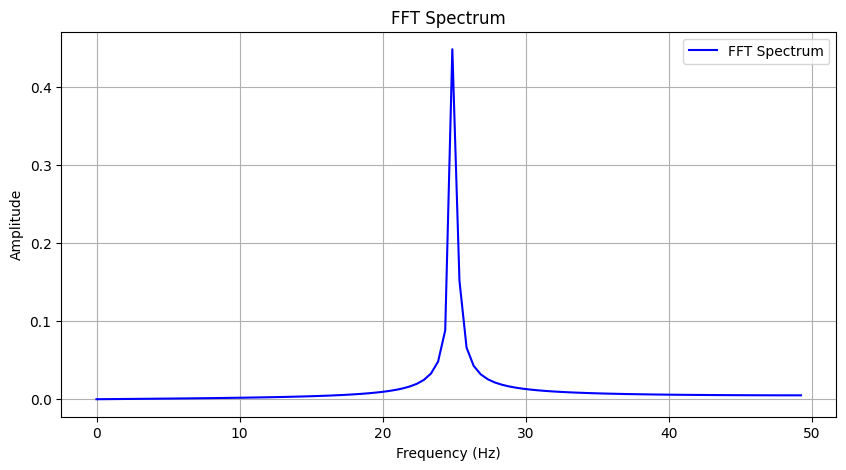

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load raw data from CSV
data = pd.read_csv('data.csv')
time = data['time'].values  # Extract time column
amplitude = data['amplitude'].values  # Extract amplitude column

# Function to plot FFT spectrum
def plot_fft_spectrum(time, amplitude):
    n = len(time)  # Number of samples
    dt = time[1] - time[0]  # Sampling interval 
    f_s = 1 / dt  # Sampling frequency 
    
    # Perform FFT
    fft_result = np.fft.fft(amplitude)
    fft_amplitude = np.abs(fft_result) / n  # Normalize amplitude
    freqs = np.fft.fftfreq(n, dt)  # Frequency bins
    
    # Filter positive frequencies 
    positive_freqs = freqs[:n // 2]
    positive_amplitude = fft_amplitude[:n // 2]
    
    # Plot the FFT spectrum
    plt.figure(figsize=(10, 5))
    plt.plot(positive_freqs, positive_amplitude, label='FFT Spectrum', color='blue')
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.title("FFT Spectrum")
    plt.grid()
    plt.legend()
    plt.show()

# Plot FFT spectrum using raw data
plot_fft_spectrum(time, amplitude)


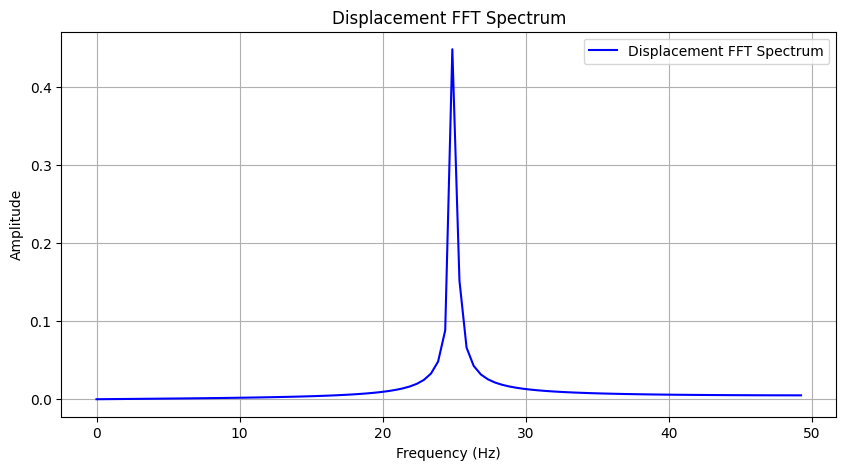

C:\Users\J8354377\AppData\Local\Temp\ipykernel_12976\1391320917.py:48: RuntimeWarning: invalid value encountered in divide
  fft_velocity = fft_result / (1j * omega)


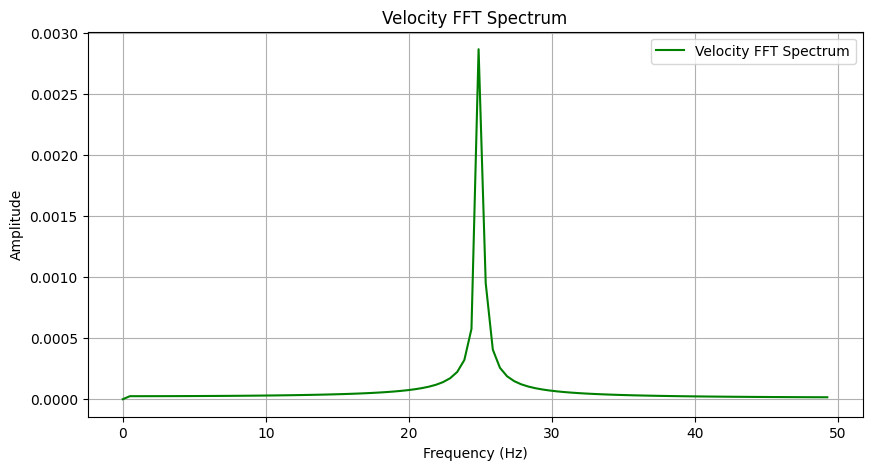

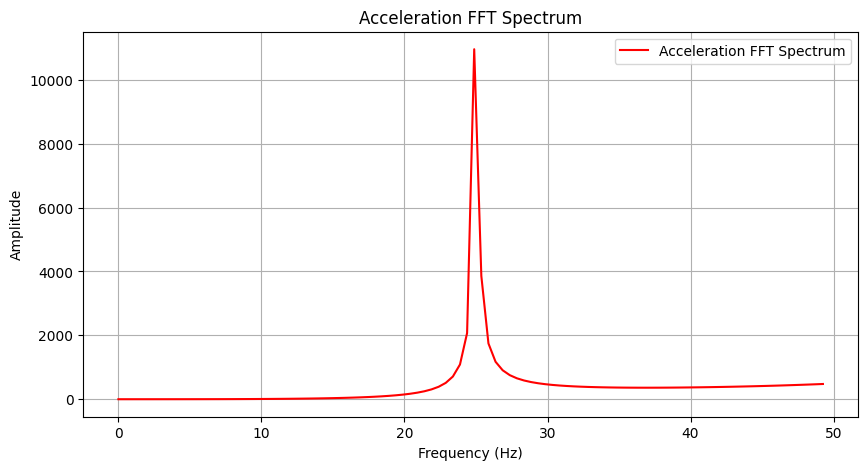

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load raw data from CSV
data = pd.read_csv('data.csv')
time = data['time'].values  # Extract time column
amplitude = data['amplitude'].values  # Extract amplitude column (Displacement)

# Function to calculate FFT and plot spectrum
def plot_fft_spectrum(time, amplitude, title="FFT Spectrum"):
    n = len(time)  # Number of samples
    dt = time[1] - time[0]  # Sampling interval
    f_s = 1 / dt  # Sampling frequency

    # Perform FFT
    fft_result = np.fft.fft(amplitude)
    fft_amplitude = np.abs(fft_result) / n  # Normalize amplitude
    freqs = np.fft.fftfreq(n, dt)  # Frequency bins

    # Filter positive frequencies
    positive_freqs = freqs[:n // 2]
    positive_amplitude = fft_amplitude[:n // 2]

    # Plot the FFT spectrum
    plt.figure(figsize=(10, 5))
    plt.plot(positive_freqs, positive_amplitude, label=title, color='blue')
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.title(title)
    plt.grid()
    plt.legend()
    plt.show()
    return positive_freqs, positive_amplitude

# Calculate Velocity FFT and Acceleration FFT
def calculate_velocity_acceleration_fft(time, amplitude):
    n = len(time)  # Number of samples
    dt = time[1] - time[0]  # Sampling interval
    f_s = 1 / dt  # Sampling frequency 

    # Perform FFT
    fft_result = np.fft.fft(amplitude)
    freqs = np.fft.fftfreq(n, dt)  # Frequency bins

    # Velocity FFT: Divide by (jω) = 2πf in the frequency domain
    omega = 2 * np.pi * freqs
    fft_velocity = fft_result / (1j * omega)
    fft_velocity[0] = 0  # Remove DC component (divide by zero issue)

    # Acceleration FFT: Multiply by (jω)² = -(2πf)²
    fft_acceleration = -omega**2 * fft_result

    # Get positive frequencies
    positive_freqs = freqs[:n // 2]
    positive_velocity_amplitude = np.abs(fft_velocity[:n // 2]) / n
    positive_acceleration_amplitude = np.abs(fft_acceleration[:n // 2]) / n

    return positive_freqs, positive_velocity_amplitude, positive_acceleration_amplitude

# Plot FFT spectrum for Displacement
plot_fft_spectrum(time, amplitude, title="Displacement FFT Spectrum")

# Calculate and plot FFT spectra for Velocity and Acceleration
freqs, velocity_fft, acceleration_fft = calculate_velocity_acceleration_fft(time, amplitude)

# Plot Velocity FFT
plt.figure(figsize=(10, 5))
plt.plot(freqs, velocity_fft, label="Velocity FFT Spectrum", color='green')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Velocity FFT Spectrum")
plt.grid()
plt.legend()
plt.show()

# Plot Acceleration FFT
plt.figure(figsize=(10, 5))
plt.plot(freqs, acceleration_fft, label="Acceleration FFT Spectrum", color='red')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Acceleration FFT Spectrum")
plt.grid()
plt.legend()
plt.show()
